# Assignment 5 Answer

- Unless dictated by the exercise, the point of the code is to generate the visuals, and can therefore be ignored.
- There are some lecture references in this document. They are notes to myself and can be ignored.

In [1]:
from scipy.integrate import odeint
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Q1

A damped driven harmonic oscillator has the form:

$F(t) - kx - b\dot{x} - m\ddot{x} = 0$

where $F(t)$ is the driving force, $k$ is the spring constant, $b$ is the damping constant, and $m$ is the mass.

$m\ddot{x}$ resists acceleration. $b\dot{x}$ resists velocity. $kx$ resists displacement.

If $b = 0$ the system is undamped and a sinusoidal input will lead to unbounded growth of its state.

The system can be described in state space as:

$\dot{x} = Ax + Bu$

$\begin{bmatrix} \dot{x} \\ \ddot{x} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -\frac{k}{m} & -\frac{b}{m} \end{bmatrix} \begin{bmatrix} x \\ \dot{x} \end{bmatrix} + \begin{bmatrix} 0 \\ \frac{1}{m} \end{bmatrix} F(t)$


In [65]:
def plot_harmonic_oscilator(k, b, m, duration, F):
    A = np.array([
        [0, 1],
        [-k/m, -b/m]
    ])

    B = np.array([0, 1/m])

    def model(x, t):
        return A.dot(x) + B*F(t)
    
    x0 = np.array([0, 0])
    t = np.linspace(0, duration, 1000)
    x = odeint(model, x0, t)

    plt.plot(t, x[:, 0])

In [66]:
m = 1
k = 1
b = 1
duration = 20

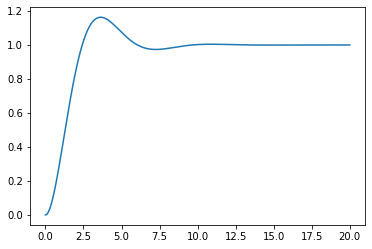

In [67]:
# Damped step response
plot_harmonic_oscilator(k, b, m, duration, lambda t: 1)

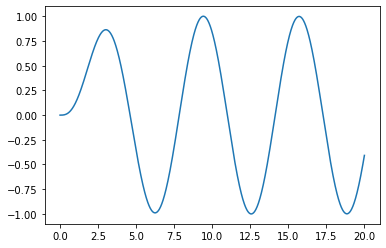

In [68]:
# Damped driven response
plot_harmonic_oscilator(k, b, m, duration, lambda t: np.sin(t))

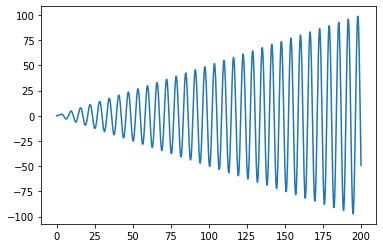

In [69]:
# Undamped driven response
plot_harmonic_oscilator(k, 0, m, 10*duration, lambda t: np.sin(t))

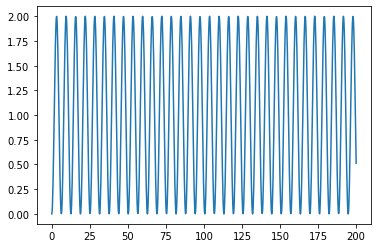

In [70]:
# Undamped step response
plot_harmonic_oscilator(k, 0, m, 10*duration, lambda t: 1)

When undamped, the system is unstable when given a harmonic input. For this reason, the system is not BIBO stable for all bounded inputs for every $k$, $b$, and $m$.

## Q2

Linearisation:\
$\bar{f}(x) \approx f(a) + \dot{f}(a)(x - a)$

Such a system would be marginally stable if $\dot{f}(a) = 0$.

S1 (unstable):

$\dot{x} = x^2$\
$\ddot{x} = 2x$\
$\dot{\bar{x}} \approx 0 + 0(x - 0)$\
$\dot{\bar{x}} \approx 0$

S2 (stable):

$\dot{x} = -x^3$\
$\ddot{x} = -3x^2$\
$\dot{\bar{x}} \approx 0 + 0(x - 0)$\
$\dot{\bar{x}} \approx 0$

Both S1 and S2 linearise to $\dot{\bar{x}} \approx 0$ which is marginally stable.

## Q3

Lecture 144 Does linearizing preserve the stability properties

Both stable and unstable systems may result in the same linearisation. Therefore, linearisation does not preserve stability properties.

## Q4

### 1

The system has the solution $x_1 = x_2$.

A vector representing this is:

$x = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

### 2

The system has no solution because the point $(1, 1, 1)$ is not in the span of the columns of $A$.

$A = \begin{bmatrix}
2 & -1 \\
-3 & 3 \\
-1 & 2
\end{bmatrix}$

While $Ax$ produces vectors of dimension 3, the span of the columns produces a plane in $\mathbb{R}^3$.

This plane is given by:

$x_1 \begin{bmatrix} 2 \\ -3 \\ -1 \end{bmatrix} + x_2 \begin{bmatrix} -1 \\ 3 \\ 2 \end{bmatrix}$

## Q5

The equilibria of the jordan matrix

$A = \begin{bmatrix}
J_{\lambda_1}^{n_{1,1}} \\
& J_{\lambda_1}^{n_{1,2}} \\
&& J_{\lambda_2}^{n_{2,1}}
\end{bmatrix}$

$A = \begin{bmatrix}
\lambda_1 \\
& \lambda_1 & 1 \\
&& \lambda_1 \\
&&& \lambda_2 & 1 \\
&&&& \lambda_2
\end{bmatrix}$

is given by:

$Ax = 0$

$A = \begin{bmatrix}
\lambda_1 \\
& \lambda_1 & 1 \\
&& \lambda_1 \\
&&& \lambda_2 & 1 \\
&&&& \lambda_2
\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

The only valid solution is: $x = 0$, meaning the equilibria is at the origin.